Import all the libraries and the dataset

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

filename="C:\ML\SATO.csv"
df=pd.read_csv(filename)

columns_to_focus = [
    'Aggregate_Total_Rev', 'Aggregate_SMS_Rev', 'Aggregate_Data_Rev',
    'Aggregate_Data_Vol', 'Aggregate_ONNET_REV', 'Aggregate_OFFNET_REV',
    'Aggregate_complaint_count', 'Class'
]
df = df[columns_to_focus]


Overview of the dataset with the first five features

In [26]:
df.head()

,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,Class
0,1592.7200,23.26,2.5,1.161130e+01,25523,99000,1,Churned
1,1404.1496,174.45,27.5,2.531725e+03,14584,77299,1,Churned
2,85.5504,14.34,5.0,2.913306e+04,477,4194,1,Churned
3,2315.2292,19.25,52.5,2.674413e+05,50316,52400,2,Active
4,227.8620,2.95,42.5,1.461621e+06,2568,1701,1,Active


Concise description which tells us the number of non-null entities in each column and the datatype of the columns. We find that there are no null values in the dataset and it consists of one rows with object datatype and the rest of the columns are integers and floats.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aggregate_Total_Rev        2000 non-null   float64
 1   Aggregate_SMS_Rev          2000 non-null   float64
 2   Aggregate_Data_Rev         2000 non-null   float64
 3   Aggregate_Data_Vol         2000 non-null   float64
 4   Aggregate_ONNET_REV        2000 non-null   int64  
 5   Aggregate_OFFNET_REV       2000 non-null   int64  
 6   Aggregate_complaint_count  2000 non-null   int64  
 7   Class                      2000 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 125.1+ KB


Get the standard statistics of each column, including the count, mean, standard deviation and so on.

In [33]:
df.describe()

,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,905.020106,31.108605,58.806080,2.773961e+06,7411.284500,16457.577500,1.924500
std,1151.308507,57.908418,247.459279,8.845272e+06,16494.392836,34311.972061,2.265693
min,4.910000,0.000000,0.000000,5.860000e-02,0.000000,0.000000,1.000000
25%,247.149600,3.500000,1.250000,2.675567e+03,114.000000,1432.000000,1.000000
50%,606.575000,14.810000,13.750000,1.822864e+05,1940.500000,5039.000000,1.000000
75%,1220.045000,34.140000,53.750000,1.544505e+06,7941.000000,15790.000000,2.000000
max,24438.830000,873.980000,8295.000000,1.550312e+08,381174.000000,431440.000000,49.000000


We find the classification of the target column, that is 'Class'. This is the univariate classification.

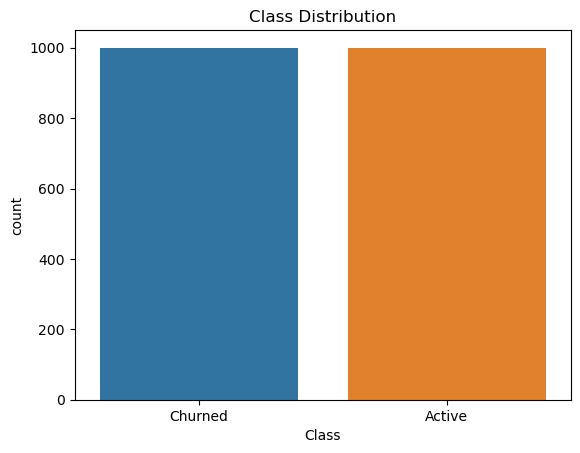

In [34]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

Moving onto the bivariate analysis. We plot all columns against each other in a scatter plot.

c:\Users\aksha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


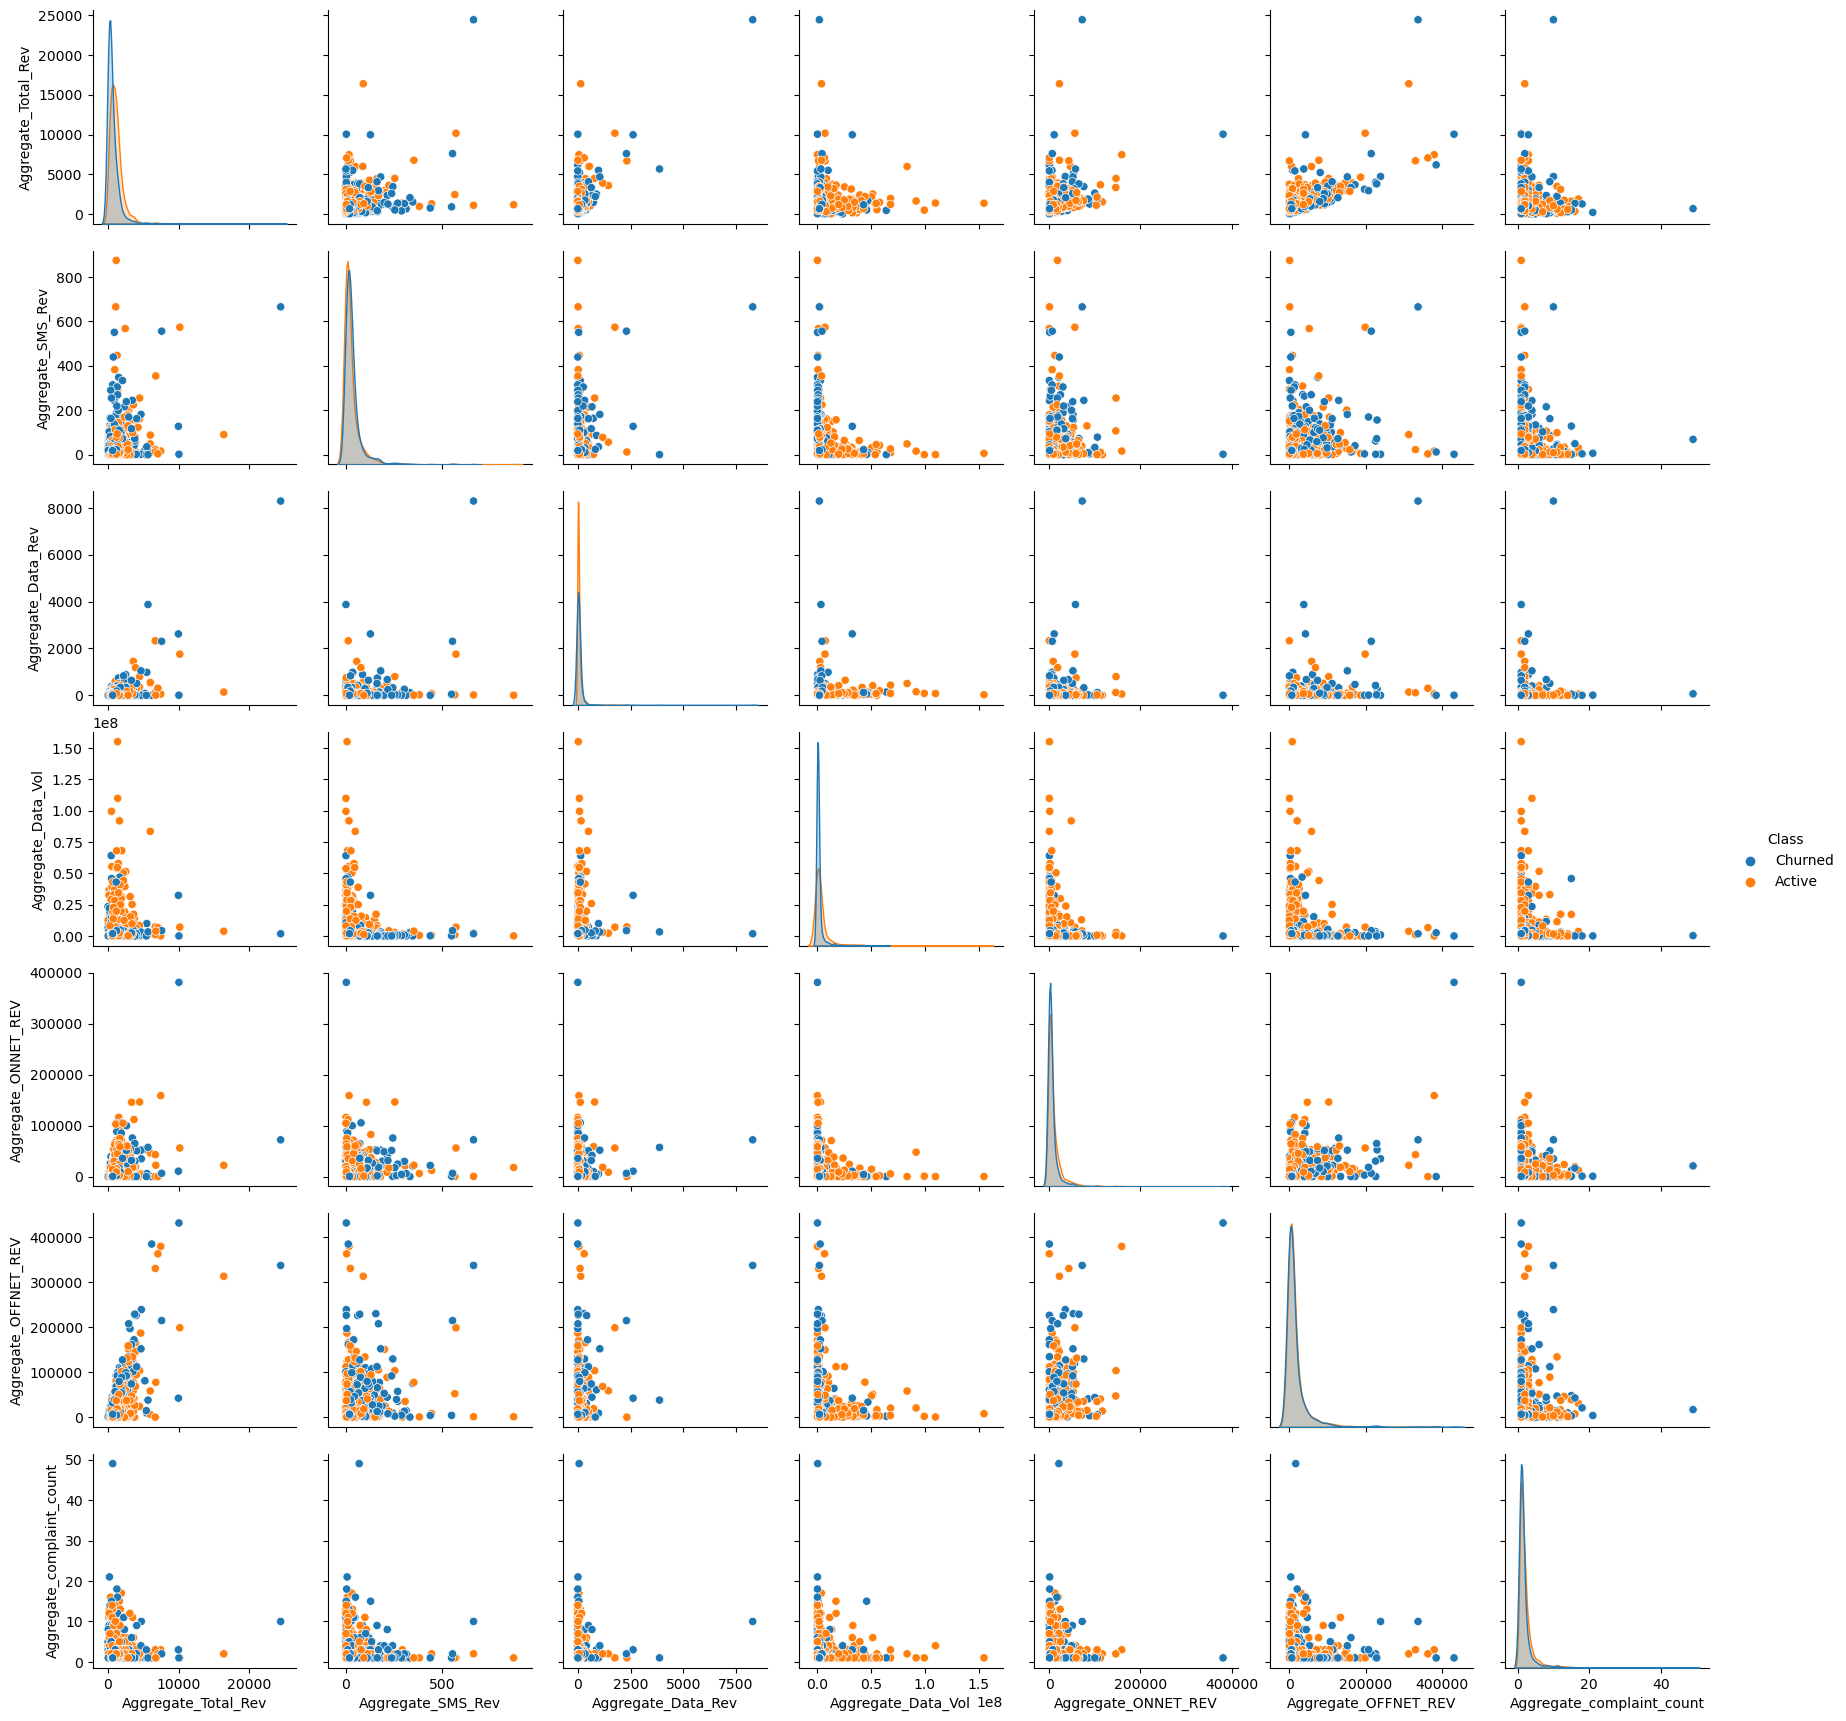

In [35]:
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

For multivariate analysis, we plot a correlation matrix to visualize the correlation between variables.

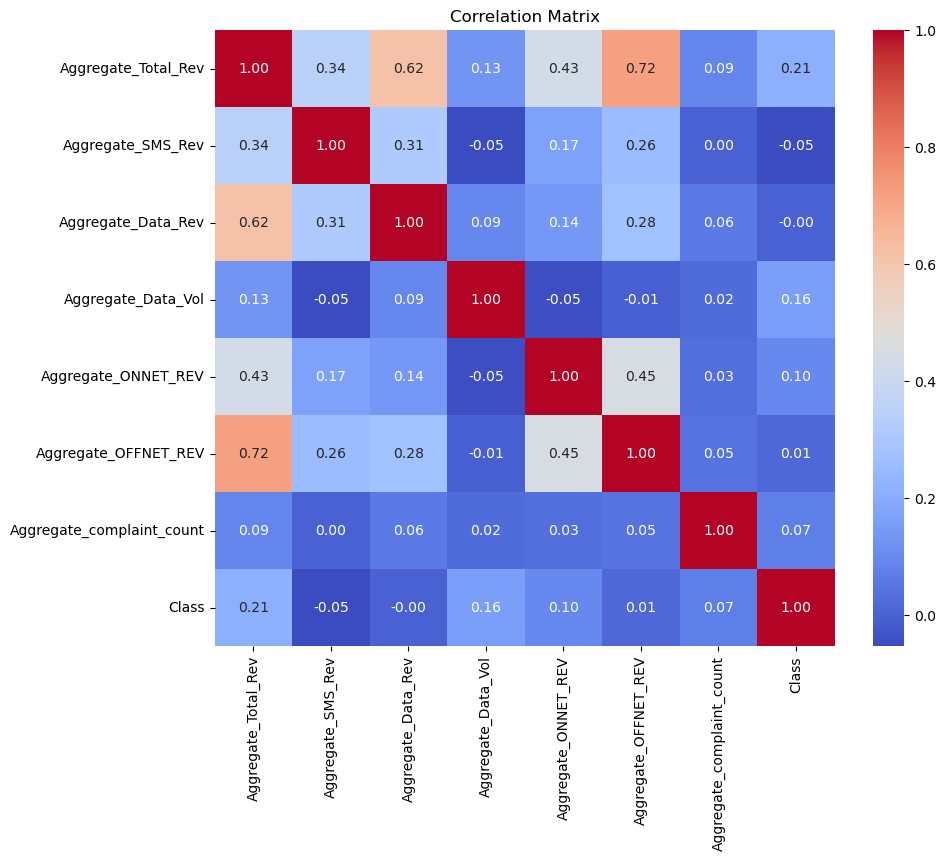

In [36]:
class_mapping = {'Active': 1, 'Churned': 0}
df['Class'] = df['Class'].map(class_mapping)
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Now we find the distribution of the data in each numerical column.

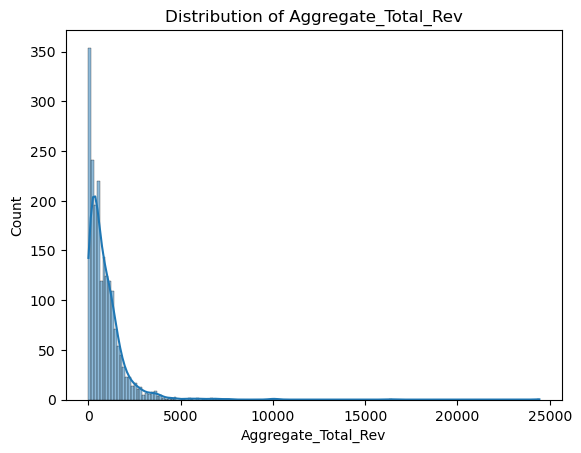

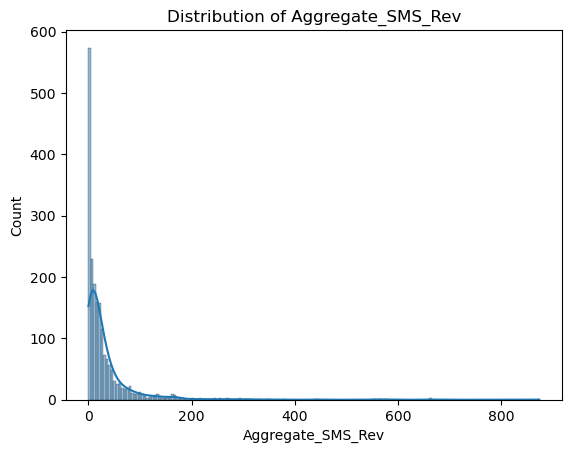

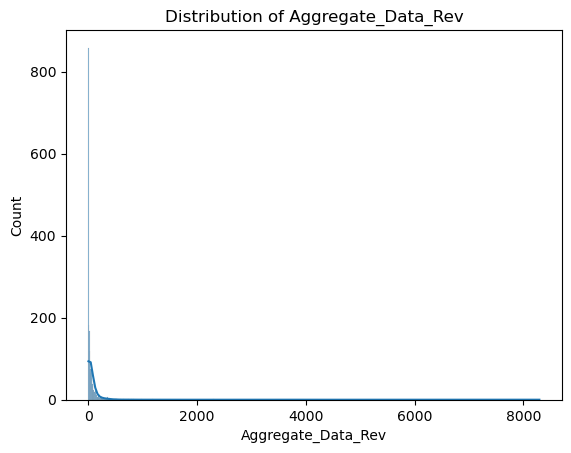

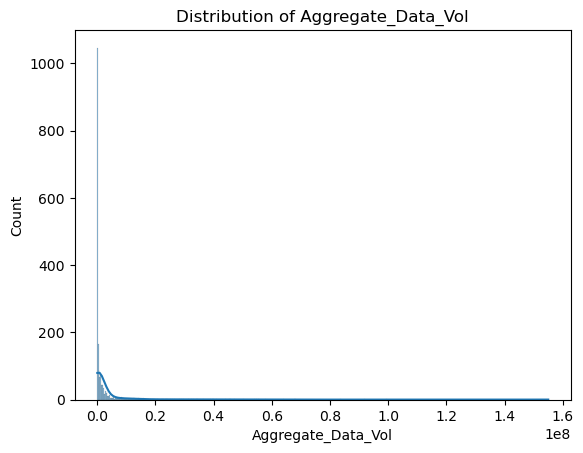

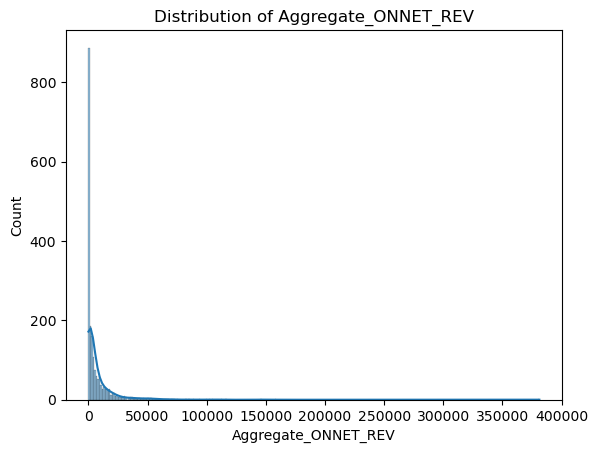

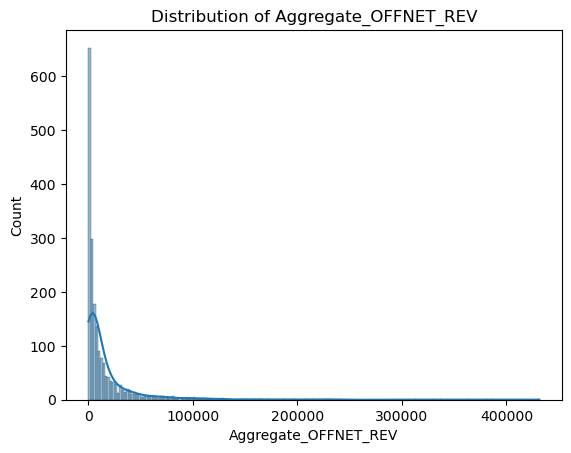

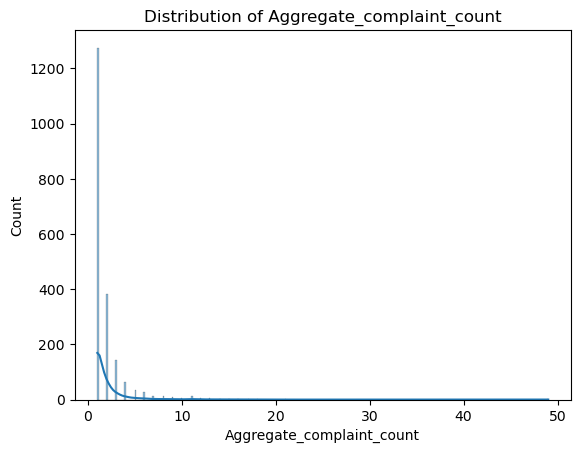

In [37]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

We find the outliers in each column. There is multiple outliers, thus it needs to be adjusted.

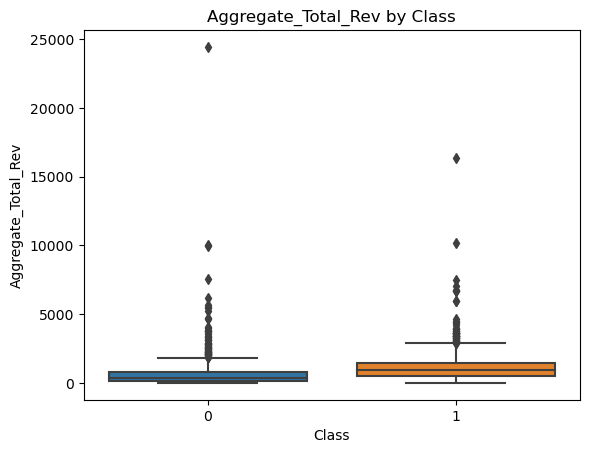

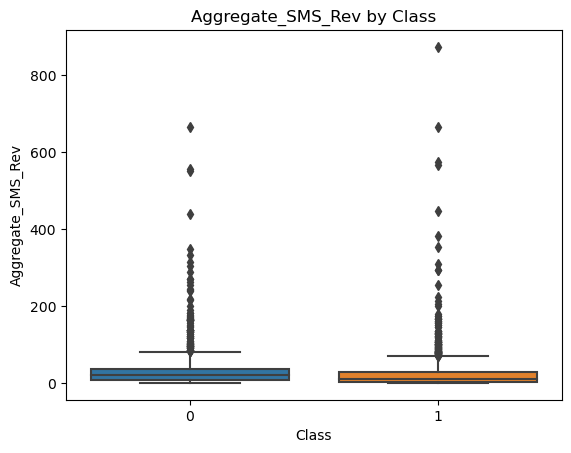

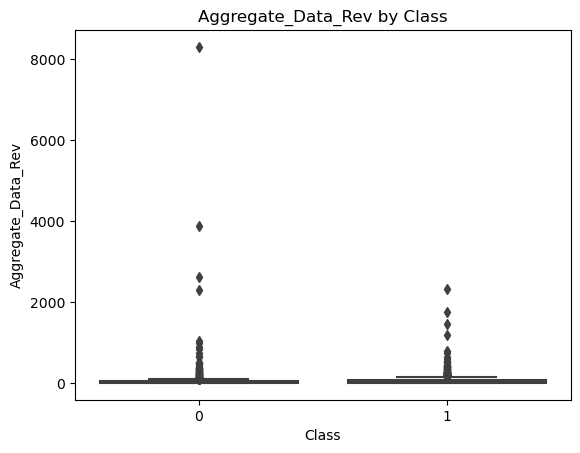

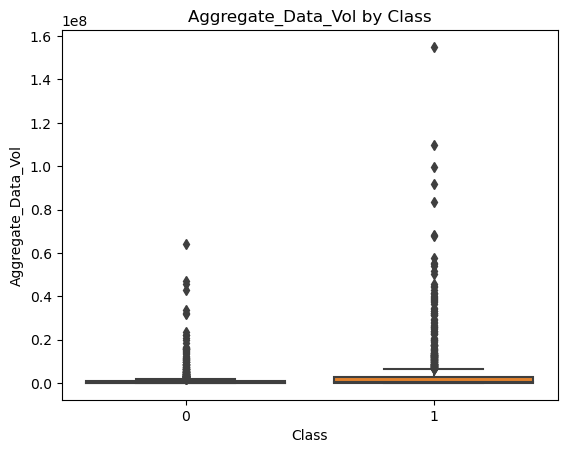

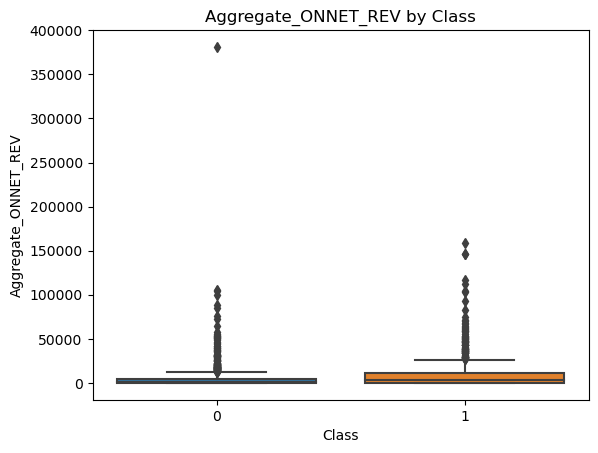

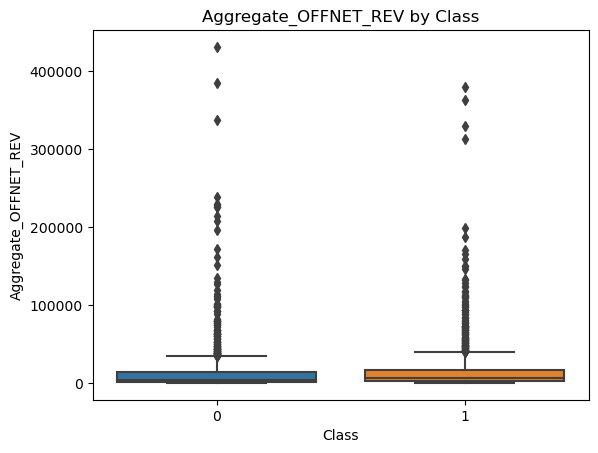

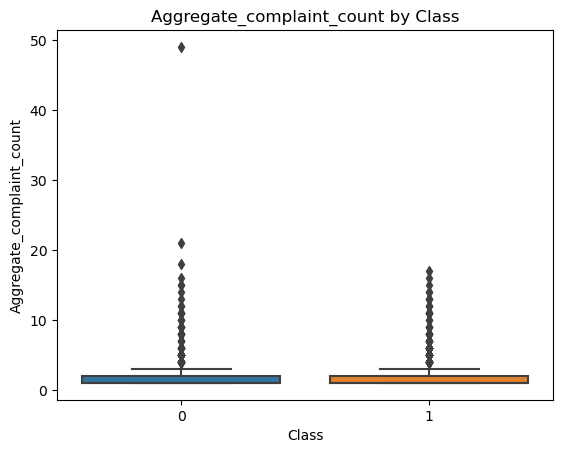

In [39]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} by Class')
    plt.show()

Importing libraries for the machine learning models

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Splitting the data into training and test sets. It is an 80-20 split.

In [51]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Fitting the data into a standard scalar for optimization so that no column is given more importance than another

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision tree - using the gini index

In [53]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

K nearest neighbors - with k value of 9

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

Finding the accuracy and the classification report of the model for the decision tree

In [80]:
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Performance:
Accuracy: 0.685
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       200
           1       0.69      0.67      0.68       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.68       400
weighted avg       0.69      0.69      0.68       400

Confusion Matrix:
 [[141  59]
 [ 67 133]]


we get a 68% accuracy which is not bad, but there is room for improvement.

Finding the accuracy and the classification report of the model for the knn model

In [81]:
print("\nK-Nearest Neighbors Performance:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))


K-Nearest Neighbors Performance:
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       200
           1       0.70      0.73      0.72       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

Confusion Matrix:
 [[138  62]
 [ 54 146]]


We get a 71% accuracy for the model, which is better than the accuracy for the decision tree model. KNN slightly outperforms Decision Trees because it captures local patterns and is less prone to overfitting, especially in noisy data or when features lack strong hierarchical relationships. Decision Trees may overfit or make splits on irrelevant features, while KNN's reliance on proximity handles non-linear decision boundaries better. This makes KNN more robust for datasets where local feature similarity is key to predicting the target.

Plotting the confusion matrix for decision tree.

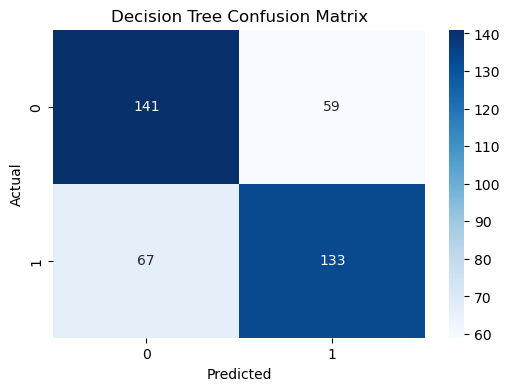

In [82]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

67 false negatives and 59 false positives. But majority of it is true positives and true negatives.

Plotting the confusion matrix for knn

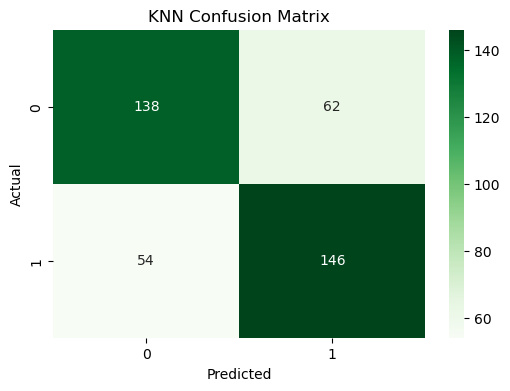

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt="d", cmap="Greens")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Very similar to the decision tree, but performs slightly better.

Model accuracy comparison

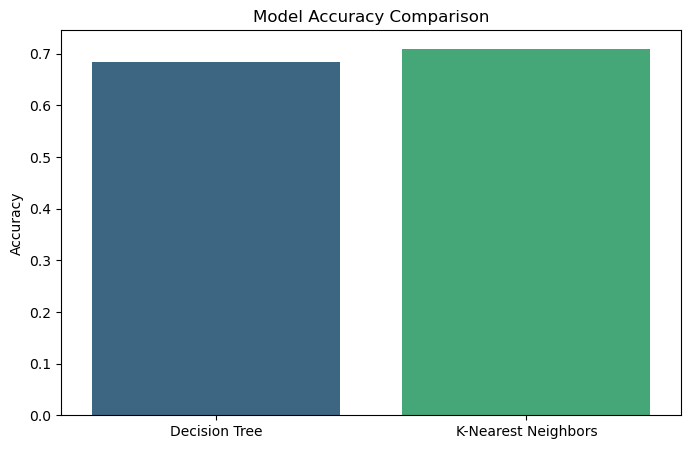

In [84]:
models = ['Decision Tree', 'K-Nearest Neighbors']
accuracy = [accuracy_score(y_test, dt_predictions), accuracy_score(y_test, knn_predictions)]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

We can conclude that the KNN model did slightly better than the decsion tree model.